Installing the required packages

In [169]:
import pandas as pd
import numpy as np
import re
import plotly.express as plt

In [170]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
from unidecode import unidecode

In [173]:
import collections
from wordcloud import WordCloud

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [175]:
df = pd.read_csv('C:/Users/ranja/PYTHON_ROOT/New_Delhi_reviews.csv')

Viewing the head of the data to get an idea of what the data looks like

In [176]:
df.head()

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147581 entries, 0 to 147580
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating_review  147581 non-null  int64 
 1   review_full    147579 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


Checking for NA is important to assess how we need to deal with NA values

In [178]:
df.isna().sum()

rating_review    0
review_full      2
dtype: int64

As we can see there are only two NA values so we can safely drop them

In [179]:
df.dropna(inplace = True)

In [180]:
plt.figure(figsize = (15, 9))

<Figure size 1200x720 with 0 Axes>

<Figure size 1200x720 with 0 Axes>

In [181]:
ratings = df['rating_review'].value_counts()
labels = ratings.index
sizes = ratings.values
colors = ['#FF5733', '#91d2df', '#cce7e8', '#29AF7F', '#73D125']

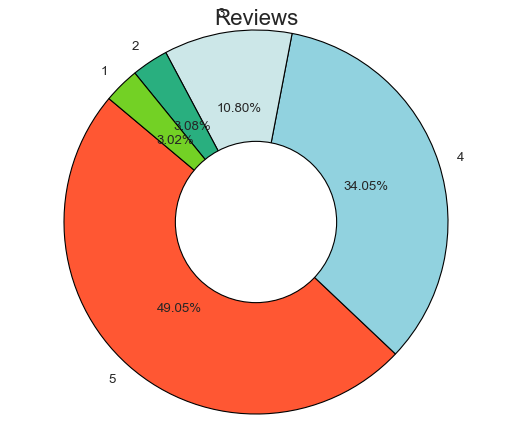

In [182]:
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.2f%%', startangle = 140)
centre_circle = plt.Circle((0, 0), 0.42, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Reviews', fontsize = 20)
plt.axis('equal')
plt.show()

In [183]:
# count of ratings
fig = px.histogram(df, x = 'rating_review', title = 'Histogram of Review Rating',
             color = 'rating_review')
fig.update_yaxes(title = 'Count')
fig.show()

As we can see how the ratings are distributed with 
5 star rating being the highest.

Let's Work on Data Cleaning now. These cleaning steps help to reduce noise and standardize the text, making it better suited for text analysis such as sorting, grouping, information extraction, or any other subsequent processing.

In [184]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters and make it lower case
    text = re.sub(r'[^a-zA-ZÀ-ú\s]', '', text.lower())
    # Tokenization
    tokens = text.split()
    # Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]
    # Remove punctuation
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Remove extra whitespace
    tokens = [token.strip() for token in tokens]
    # Remove two letter words
    tokens = [token for token in tokens if len(token) > 2]
    # Join the tokens back into a single text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [185]:
df['clean_text'] = [clean_text(text) for text in df['review_full']]
df.head()

,rating_review,review_full,clean_text
0,5,"Totally in love with the Auro of the place, re...",totally love with the auro the place really be...
1,5,I went this bar 8 days regularly with my husba...,went this bar days regularly with husband are ...
2,5,We were few friends and was a birthday celebra...,were few friends and was birthday celebration ...
3,5,Fatjar Cafe and Market is the perfect place fo...,fatjar cafe and market the perfect place for c...
4,5,"Hey Guys, if you are craving for pizza and sea...",hey guys you are craving for pizza and searchi...


The benifit we have obtained is removal of upper case texts as well as any links that may be there or any white spaces.

We will now remove any stop word as removal is important for improving the efficiency and relevance of text reviews by eliminating common words that generally do not contribute to the meaning or context of the message.

For the next step we require "nltk" package steps to install this can be found on this link:
"https://www.nltk.org/install.html"

In [186]:
import nltk; nltk.download('popular')
df['clean_text'] = df['clean_text'].apply(word_tokenize)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\ranja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\ranja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\ranja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\ranja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\ranja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [187]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['clean_text'].apply(lambda x: [word for word in x if word not in stop_words])

Next we should perform Word Normalization. Normalization is a process of transforming words into a common or standardized form in order to reduce variation and simplify text analysis.

In [212]:
# Word normalization
stemmer = SnowballStemmer('english')
df['clean_text'] = df['clean_text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Joining the words back into a single text
df['final_text'] = df['clean_text'].apply(lambda x: ' '.join(x))
df.head()

,rating_review,review_full,clean_text,final_text,sentiment
0,5,"Totally in love with the Auro of the place, re...","[total, love, auro, place, realli, beauti, qui...",total love auro place realli beauti quit fanci...,1
1,5,I went this bar 8 days regularly with my husba...,"[went, bar, day, regular, husband, fulli, sati...",went bar day regular husband fulli satisfi ser...,1
2,5,We were few friends and was a birthday celebra...,"[friend, birthday, celebr, food, good, tast, r...",friend birthday celebr food good tast realli f...,1
3,5,Fatjar Cafe and Market is the perfect place fo...,"[fatjar, cafe, market, perfect, place, casual,...",fatjar cafe market perfect place casual lunch ...,1
4,5,"Hey Guys, if you are craving for pizza and sea...","[hey, guy, crave, pizza, search, visit, cafe, ...",hey guy crave pizza search visit cafe yes high...,1


Let us get to the Analysis part:
->Firstly we can see what most people say in their review

In [189]:
words = []
for text in df['final_text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

In [190]:
#figure size
plt.figure(figsize = (15, 10))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

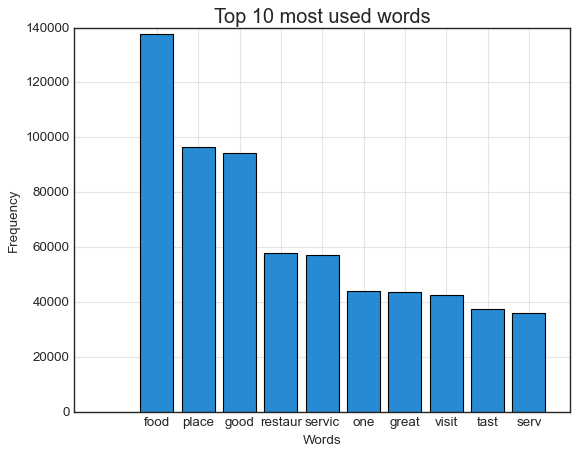

In [191]:
# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x480 with 0 Axes>

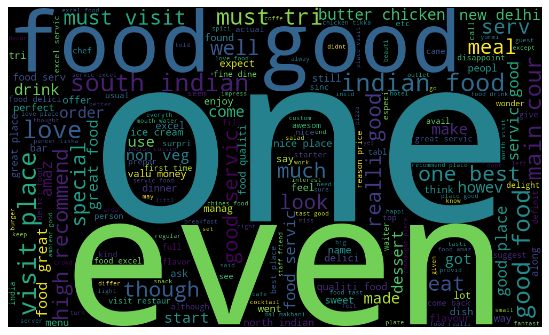

In [192]:
all_text = ' '.join(df['final_text'])
# Figure size
plt.figure(figsize = (10, 6))
# Create the WordCloud object
wordcloud = WordCloud(width = 1000, height = 600, background_color = 'black').generate(all_text)
# Plot the wordcloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Let's see what most people say about 1 rating review

In [193]:
words = []
for text, rating in zip(df['final_text'], df['rating_review']):
    if rating == 1:
        words.extend(text.split())

word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

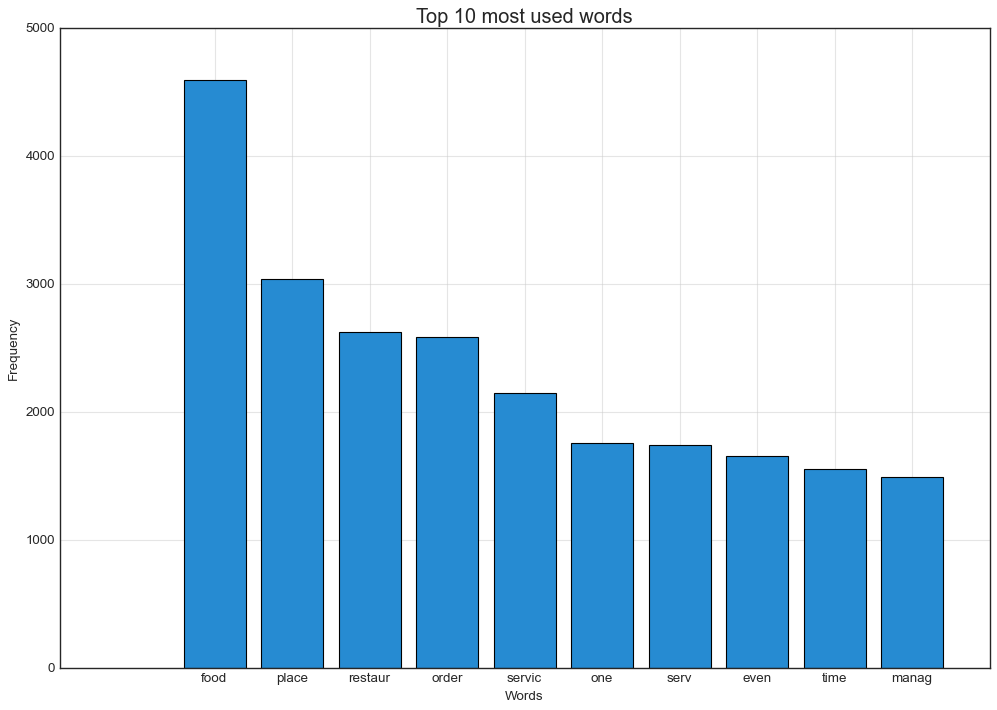

In [194]:
plt.figure(figsize=(15, 10))
# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

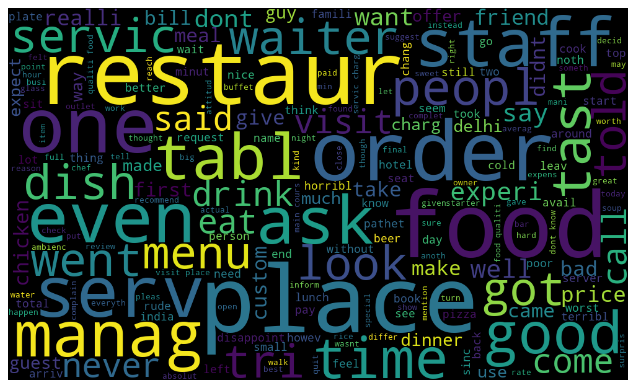

In [195]:
texts_rating_1 = df[df['rating_review'] == 1]['final_text']
# Merge texts into a single string
full_text = ' '.join(texts_rating_1)
# Create the word cloud
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)
# Plot the word cloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Let's see Most People Say About 2 Rating Review

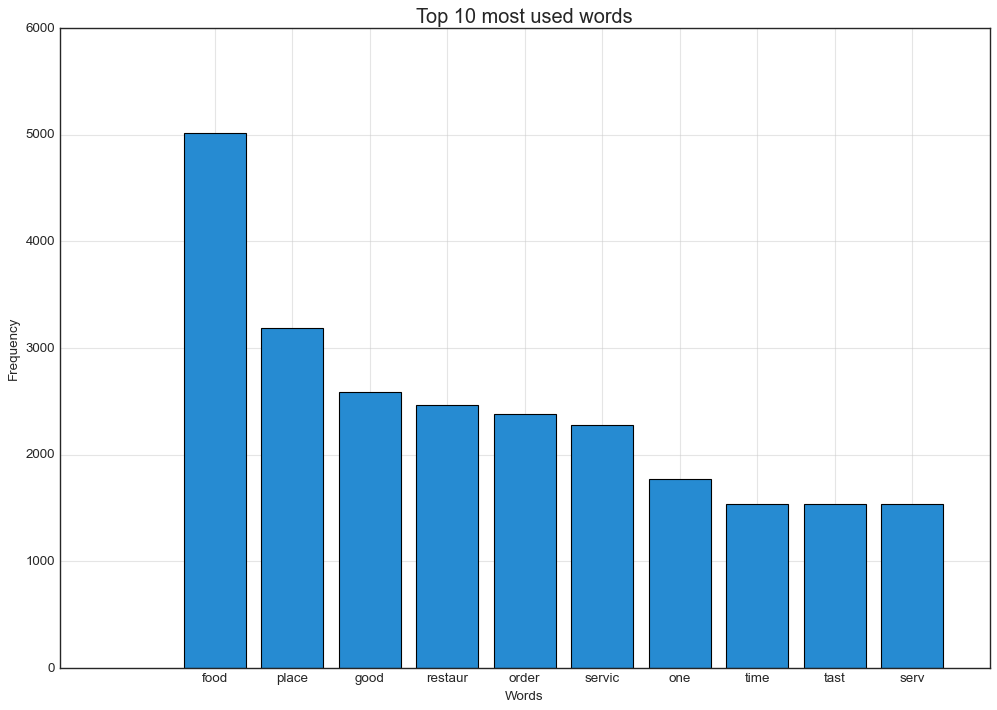

In [196]:
words = []
for text, rating in zip(df['final_text'], df['rating_review']):
    if rating == 2:
        words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
# For figure size
plt.figure(figsize=(15, 10))
# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

(-0.5, 999.5, 599.5, -0.5)

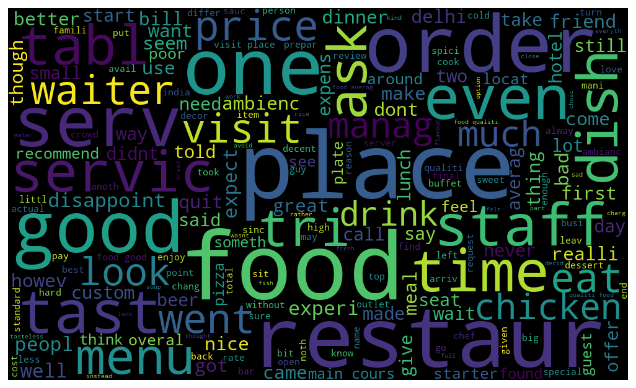

In [197]:
texts_rating_1 = df[df['rating_review'] == 2]['final_text']
# Merge texts into a single string
full_text = ' '.join(texts_rating_1)
# Create the word cloud
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)
# Plot the word cloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

Let's see what Most People Say About 3 Rating Review

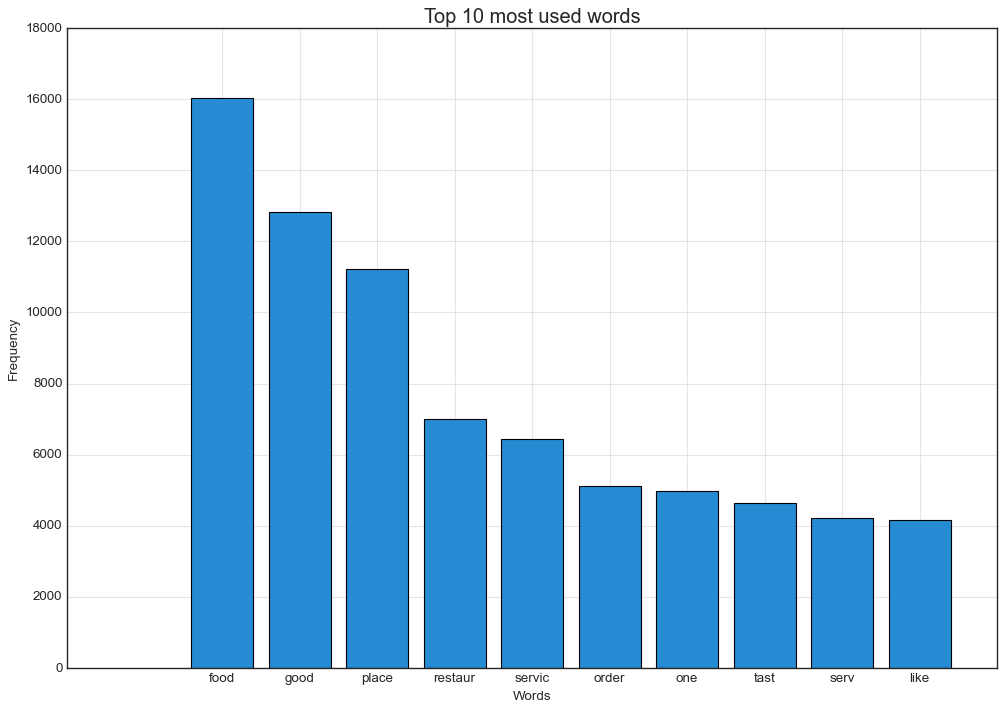

In [198]:
words = []
for text, rating in zip(df['final_text'], df['rating_review']):
    if rating == 3:
        words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
# For figure size
plt.figure(figsize=(15, 10))
# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

(-0.5, 999.5, 599.5, -0.5)

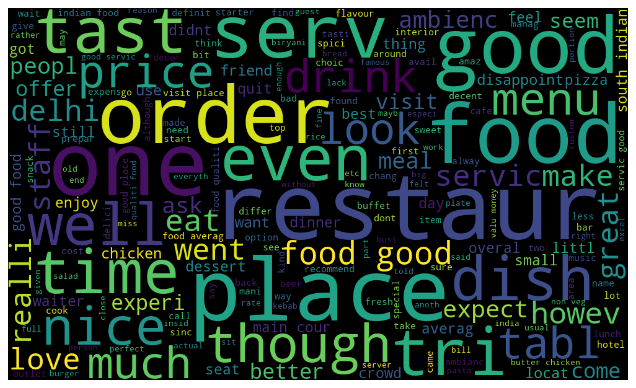

In [199]:
texts_rating_1 = df[df['rating_review'] == 3]['final_text']
# Merge texts into a single string
full_text = ' '.join(texts_rating_1)
# Create the word cloud
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)
# Plot the wordcloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

Let's see what Most People Say About 4 Rating Review

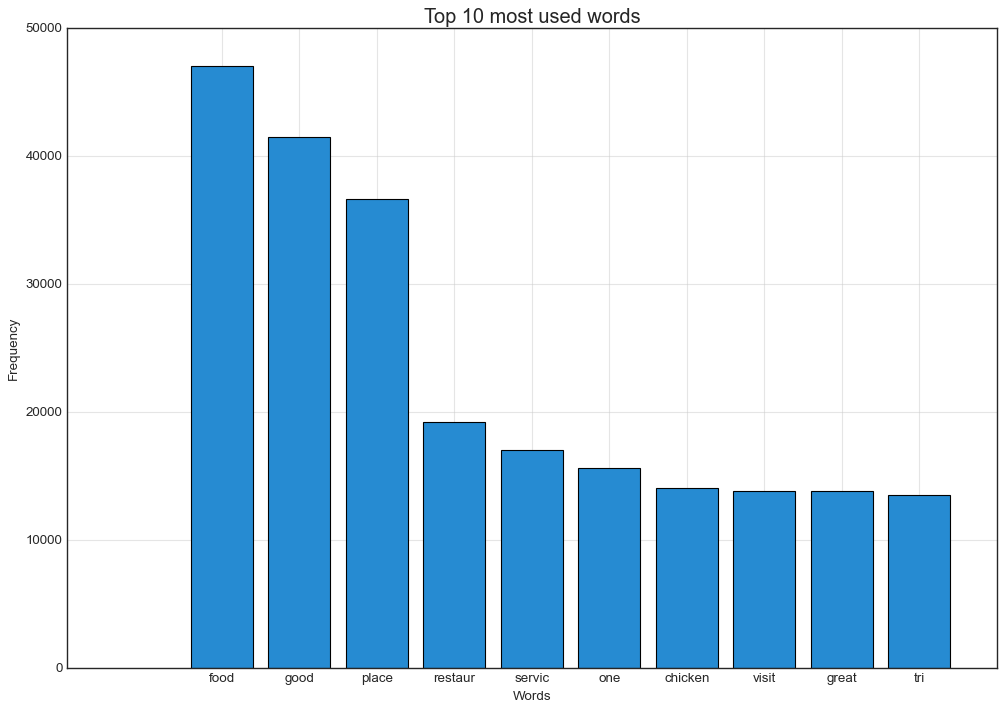

In [200]:
words = []
for text, rating in zip(df['final_text'], df['rating_review']):
    if rating == 4:
        words.extend(text.split())

word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
# For figure size
plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(15, 10))
# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

'plt.style.available' to see available styles for graph

(-0.5, 999.5, 599.5, -0.5)

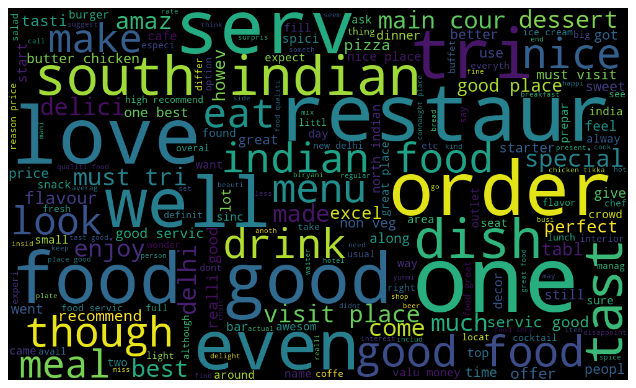

In [201]:
texts_rating_1 = df[df['rating_review'] == 4]['final_text']
# Merge texts into a single string
full_text = ' '.join(texts_rating_1)
# Create the word cloud
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)
# Plot the wordcloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

Let's see what Most People Say About 5 Rating Review

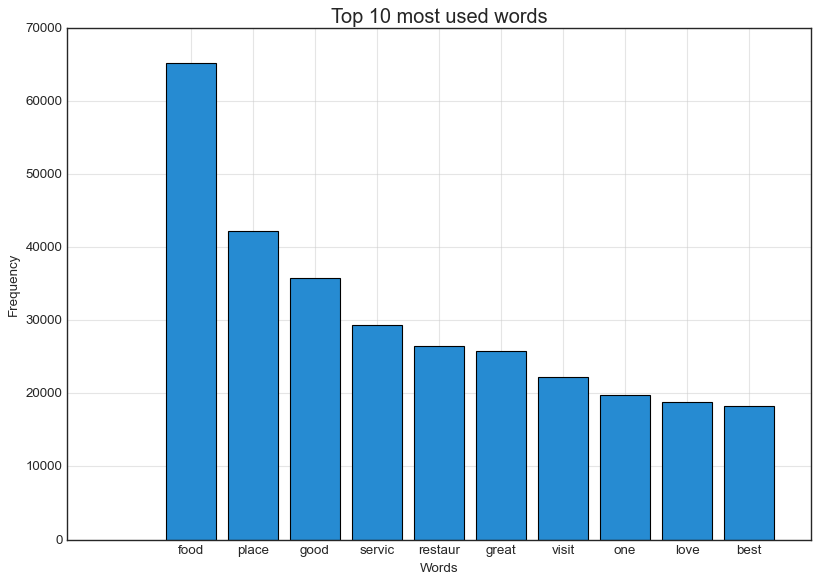

In [202]:
words = []
for text, rating in zip(df['final_text'], df['rating_review']):
    if rating == 5:
        words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
# For figure size
plt.figure(figsize=(12, 8))
# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

(-0.5, 999.5, 599.5, -0.5)

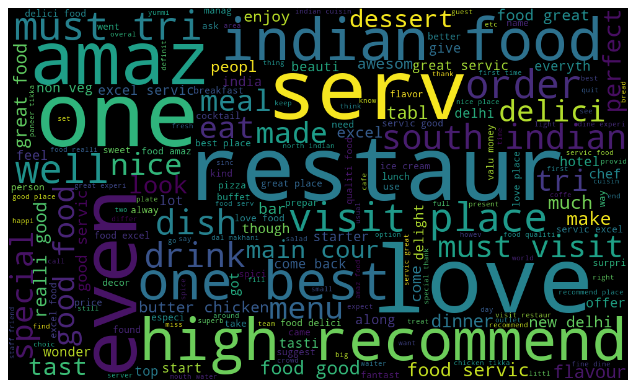

In [203]:
texts_rating_1 = df[df['rating_review'] == 5]['final_text']
# Merge texts into a single string
full_text = ' '.join(texts_rating_1)
# Create the word cloud
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)
# Plot the wordcloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

->In all charts with less than 3 in the ranking, some of the most used keywords were Food, Place, Service, -Time, Order among others, that is, many people complain, this can be a detail to improve.
->One of the most used words rated 4 is chicken haha.
->The 5 ratings have the most used words like Best, Love and Good, which is an interesting point that means that the people who take a 5 as a rating (which is most people) really liked it a lot and will probably come back.

We should now work on model creation

In [204]:
X = np.array(df['final_text'])
# Convert text to numerical
cv = CountVectorizer()
X = cv.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, df['rating_review'], test_size = 0.20, random_state = 0)

In [205]:
# Model
mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
# Predicting
pred_mnb = mnb.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest, pred_mnb)}')

Accuracy: 0.623390703347337


With these results and training, the model is able to predict what the classification will be with almost 62% accuracy. Now, to make it more precise, I will classify all ratings less than 3 as negative and greater than 3 as positive.

In [206]:
def sentiment_analysis(text):
    if text <= 3: # Negative review
        return 0 
    else: 
        return 1 # Positive review
df['sentiment'] = df['rating_review'].apply(sentiment_analysis)

In [207]:
#Split the data with the column "sentiment"
xtrain, xtest, ytrain, ytest = train_test_split(X, df['sentiment'], test_size = 0.20, random_state = 0)

In [208]:
# Model
mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
# Predicting
pred_mnb = mnb.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest, pred_mnb)}')

Accuracy: 0.8863328364277002


With this, we have a good result where the model can classify whether the evaluation is positive or negative (considering 3 or below as negative)

In [210]:
import string
from collections import Counter, defaultdict
import re
from typing import Union, List
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ranja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [211]:
fig = px.tools.make_subplots(rows = 1, cols = 3)
title_ = ["negative", "neutral", "positive"]

AttributeError: module 'plotly.express' has no attribute 'tools'

In [ ]:
import string
from collections import Counter, defaultdict
import re
from typing import Union, List
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

We will work on further visualisation

In [ ]:
class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text

In [ ]:
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

In [ ]:
def remove_punct(text):
    text = re.sub(r'[^\w\s]', " ", text)
    text = re.sub(' +', ' ', text)
    return text

clean = CleanText()

In [ ]:
def label_encode(x):
    if x == 1 or x == 2:
        return 0
    if x == 3:
        return 1
    if x == 5 or x == 4:
        return 2
    
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

In [ ]:
df = pd.read_csv('C:/Users/ranja/PYTHON_ROOT/New_Delhi_reviews.csv')

In [ ]:
df = df.dropna()
df.isnull().sum()
df.reset_index(drop = True, inplace = True)

In [ ]:
# encode label and mapping label name
df["label"] = df["rating_review"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [ ]:
# clean text, lowercase and remove punk
r = []
for i in range(len(df)):
    r.append(remove_punct(clean(remove_emoji(df['review_full'][i]).lower())[0][0]))
df['Review'] = r

In [ ]:
def plot_wordcloud(data, title = None):
    wordcloud = WordCloud(
        max_words = 200, max_font_size = 40,
        background_color = 'white', random_state = 1).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust()

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
plot_wordcloud(df["Review"].values)

In [ ]:
fig = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "bar"}]])
fig.add_trace(go.Pie(labels = df.label_name.value_counts().index,
                             values = df.label.value_counts().values), 1, 1)

fig.add_trace(go.Bar(x = df.label_name.value_counts().index, y = df.label.value_counts().values))
fig.show()

In [ ]:
# tokenize data
df["tokenized_review"] = df.Review.apply(lambda x: tokenize(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_review"].apply(lambda x: len(x.split()))

In [ ]:
fig = px.histogram(df, x = "sent_token_length", nbins = 20,
                   barmode ='group', histnorm = "percent")
fig.show()

In [ ]:
(df.sent_token_length < 512).mean()

Token Counts with BERT tokenizer
Since we will create a Transformers-based model, the value that BERT tokinezer will give us is very important. With the information here, the value of the seq_len parameter that we will use while encoding the data will be decided.

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)

In [ ]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["Review"].apply(lambda x: len(tokenizer(x, add_special_tokens = False)["input_ids"]))

In [ ]:
fig = px.histogram(df, x = "sent_token_length", nbins = 20,
                   barmode='group', histnorm="percent")
fig.show()

In [ ]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 512).mean()

Characters Count in the Data
Let's look at the frequency of the number of characters. It will give us information about the overall size of our data

In [ ]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

Reviews Lengths
When we look at the number of characters per comment, it can give us very striking information about the data. Here, when we look at the length of the comments made by people according to their feelings, negative comments are shorter than neutral and positive comments. We can come to the notion that people simply express negative things

In [ ]:
plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Rewiev')

In [ ]:
plot_dist3(df[df['label'] == 2], 'Character Count',
           'Characters Per "Positive" Rewiev')

In [ ]:
plot_dist3(df[df['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Rewiev')

Word Counts
We see that the situation in the number of characters and the situation in the number of words are the same. We have seen that people use less word count when expressing negative things.

In [ ]:
plot_word_number_histogram(df[df['label'] == 0]['Review'],
                           df[df['label'] == 1]['Review'],
                           df[df['label'] == 2]['Review'])

In [ ]:
# remove punk 
df['tokenized_review'] = df['tokenized_review'].apply(lambda x: remove_punct(x))

In [ ]:
texts = df['tokenized_review']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)


fig = go.Figure(go.Bar(x = y, y = x, orientation = 'h'))
fig.update_layout( title ={'text': "Most Common Words"})
fig.show()

In [ ]:
#Most Common ngrams
fig = make_subplots(rows = 1, cols = 3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(x = y, y = x, orientation = 'h', type = "bar", name = title_[i]))
    
fig.update_layout(title = dict(text = 'Most Common ngrams per Classes'))
fig.show()

In [ ]:
def _get_top_ngram(corpus, n = None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range = (n, n), max_df = 0.9).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:15]

In [ ]:
# unigram
fig = make_subplots(rows = 1, cols = 3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x = y, y = x,
                orientation = 'h', type = "bar", name = title_[i]))
    

fig.update_layout(title = dict(text = 'Most Common unigrams per Classes'))      
fig.show()

In [ ]:
fig = make_subplots(rows = 1, cols = 3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x = y, y = x,
                orientation = 'h', type = "bar", name = title_[i]))

fig.update_layout(
    title = dict(text = 'Most Common trigrams per Classes'))
fig.show()

We examined and visualized the data, now we can move on to the model building part.

In [ ]:
import os
import random
from pathlib import Path
import json

In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [ ]:
class Config():
    seed_val = 17
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    epochs = 5 
    batch_size = 6
    seq_length = 512
    lr = 2e-5
    eps = 1e-8
    pretrained_model = 'bert-base-uncased'
    test_size = 0.15
    random_state = 42
    add_special_tokens = True 
    return_attention_mask = True 
    pad_to_max_length = True 
    do_lower_case = False
    return_tensors = 'pt'

config = Config()

In [ ]:
# params will be saved after training
params = {"seed_val": config.seed_val,
    "device" : str(config.device),
    "epochs" : config.epochs, 
    "batch_size" : config.batch_size,
    "seq_length" : config.seq_length,
    "lr" : config.lr,
    "eps" : config.eps,
    "pretrained_model" :  config.pretrained_model,
    "test_size" : config.test_size,
    "random_state" : config.random_state,
    "add_special_tokens" : config.add_special_tokens,
    "return_attention_mask" : config.return_attention_mask,
    "pad_to_max_length" : config.pad_to_max_length,
    "do_lower_case" : config.do_lower_case,
    "return_tensors" : config.return_tensors,
         }

In [ ]:
# set random seed and device
import random

device = config.device

random.seed(config.seed_val)
np.random.seed(config.seed_val)
torch.manual_seed(config.seed_val)
torch.cuda.manual_seed_all(config.seed_val)
df.head()

Train and va,idation

In [ ]:
#split train test
from sklearn.model_selection import train_test_split

train_df_, val_df = train_test_split(df, 
                                    test_size=0.10, 
                                    random_state=config.random_state, 
                            stratify=df.label.values)

In [ ]:
train_df_.head()

In [ ]:
train_df, test_df = train_test_split(train_df_, 
                                    test_size=0.10, 
                                    random_state=42, 
                            stratify=train_df_.label.values)

In [ ]:
# count of unique label  control 
print(len(train_df['label'].unique()))
print(train_df.shape)

In [ ]:
# count of unique label  control 
print(len(val_df['label'].unique()))
print(val_df.shape)

In [ ]:
print(len(test_df['label'].unique()))
print(test_df.shape)

BertTokenizer and Encoding the Data

In [ ]:
# create tokenizer
tokenizer = BertTokenizer.from_pretrained(config.pretrained_model, 
                                          do_lower_case=config.do_lower_case)

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    train_df.Review.values, 
    add_special_tokens = config.add_special_tokens, 
    return_attention_mask = config.return_attention_mask, 
    pad_to_max_length = config.pad_to_max_length, 
    max_length = config.seq_length, 
    return_tensors = config.return_tensors
)
encoded_data_val = tokenizer.batch_encode_plus(
    val_df.Review.values, 
    add_special_tokens = config.add_special_tokens, 
    return_attention_mask = config.return_attention_mask, 
    pad_to_max_length = config.pad_to_max_length,
    max_length = config.seq_length, 
    return_tensors = config.return_tensors
)

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_df.label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_df.label.values)

In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Creating the Model
bert-base-uncased is a smaller pre-trained model.
Using num_labels to indicate the number of output labels.

In [ ]:
model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
                                                      num_labels = 3,
                                                      output_attentions = False,
                                                      output_hidden_states = False)

Data Loaders
DataLoader combines a dataset and a sampler, and provides an iterable over the given dataset.
We use RandomSampler for training and SequentialSampler for validation.
Given the limited memory in my environment, I set batch_size=64.


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(dataset_train, 
                              sampler = RandomSampler(dataset_train), 
                              batch_size = config.batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler = SequentialSampler(dataset_val), 
                                   batch_size = config.batch_size)

Optimizer & Scheduler

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr = config.lr, 
                  eps = config.eps)
                  

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = len(dataloader_train)*config.epochs)Performance Metrics
We will use f1 score as performance metrics.



Performance Metrics
We will use f1 score as performance metrics.



In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels, label_dict):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat == label]
        y_true = labels_flat[labels_flat == label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds == label])}/{len(y_true)}\n')

In [ ]:
#Training Loop
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(config.device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
        # calculate avareage val loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals